In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Market:

    def __init__(self,
                 d_0=1.0,      # demand intercept
                 d_1=0.6,      # demand slope
                 s_0=0.1,      # supply intercept
                 s_1=0.4):     # supply slope

        self.d_0, self.d_1 = d_0, d_1
        self.s_0, self.s_1 = s_0, s_1

    def inverse_demand(self, q):
        return self.d_0 - self.d_1 * q

    def inverse_supply(self, q):
        return self.s_0 + self.s_1 * q

In [3]:
market = Market()

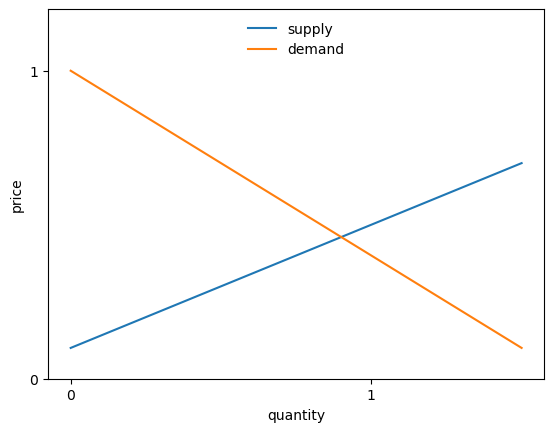

In [4]:
market = Market()

grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = market.inverse_supply(q_grid)
demand_curve = market.inverse_demand(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply')
ax.plot(q_grid, demand_curve, label='demand')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

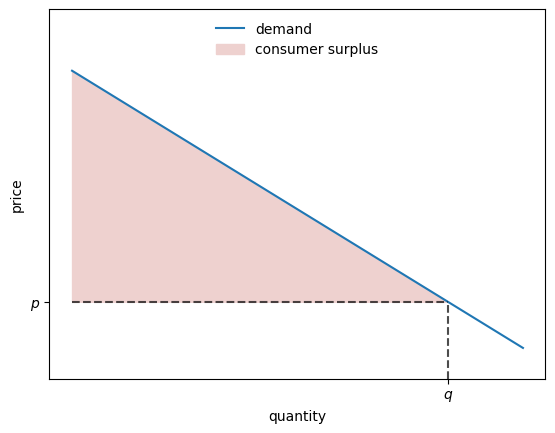

In [5]:
q = 1.25
p = market.inverse_demand(q)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, demand_curve, label='demand')
ax.fill_between(q_grid[q_grid <= q],
                demand_curve[q_grid <= q],
                ps[q_grid <= q],
                label='consumer surplus',
                color='#EED1CF')
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

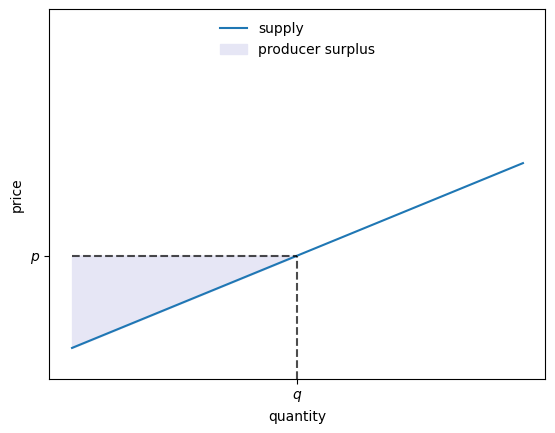

In [6]:
q = 0.75
p = market.inverse_supply(q)
ps = np.ones_like(q_grid) * p

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply')
ax.fill_between(q_grid[q_grid <= q],
                supply_curve[q_grid <= q],
                ps[q_grid <= q],
                label='producer surplus',
                color='#E6E6F5')
ax.vlines(q, 0, p, linestyle="dashed", color='black', alpha=0.7)
ax.hlines(p, 0, q, linestyle="dashed", color='black', alpha=0.7)

ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((q,))
ax.set_xticklabels(("$q$",))
ax.set_yticks((p,))
ax.set_yticklabels(("$p$",))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

In [7]:
def W(q, market):
    # Unpack
    d_0, d_1, s_0, s_1 = market.d_0, market.d_1, market.s_0, market.s_1
    # Compute and return welfare
    return (d_0 - s_0) * q - 0.5 * (d_1 + s_1) * q**2

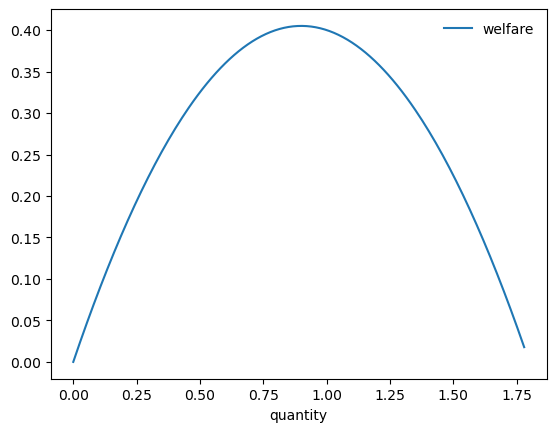

In [8]:
q_vals = np.linspace(0, 1.78, 200)
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

In [9]:
class Market:

    def __init__(self,
                 d_0=1.0,      # demand intercept
                 d_1=0.6,      # demand slope
                 s_0=0.1,      # supply intercept
                 s_1=0.4):     # supply slope

        self.d_0, self.d_1 = d_0, d_1
        self.s_0, self.s_1 = s_0, s_1

    def inverse_demand(self, q):
        return self.d_0 - self.d_1 * q**0.6

    def inverse_supply(self, q):
        return self.s_0 + self.s_1 * q**1.8

In [10]:
market = Market()

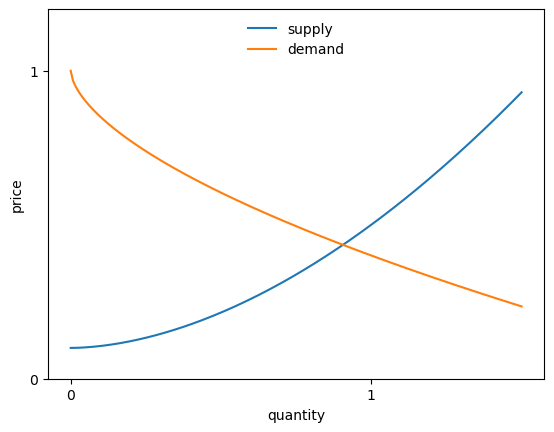

In [11]:
grid_min, grid_max, grid_size = 0, 1.5, 200
q_grid = np.linspace(grid_min, grid_max, grid_size)
supply_curve = market.inverse_supply(q_grid)
demand_curve = market.inverse_demand(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, supply_curve, label='supply')
ax.plot(q_grid, demand_curve, label='demand')
ax.legend(loc='upper center', frameon=False)
ax.set_ylim(0, 1.2)
ax.set_xticks((0, 1))
ax.set_yticks((0, 1))
ax.set_xlabel('quantity')
ax.set_ylabel('price')
plt.show()

In [12]:
def W(q, market):
    # Unpack
    d_0, d_1 = market.d_0, market.d_1
    s_0, s_1 = market.s_0, market.s_1
    # Compute and return welfare
    S_c = d_0 * q - d_1 * q**1.6 / 1.6
    S_p = s_0 * q + s_1 * q**2.8 / 2.8
    return S_c - S_p

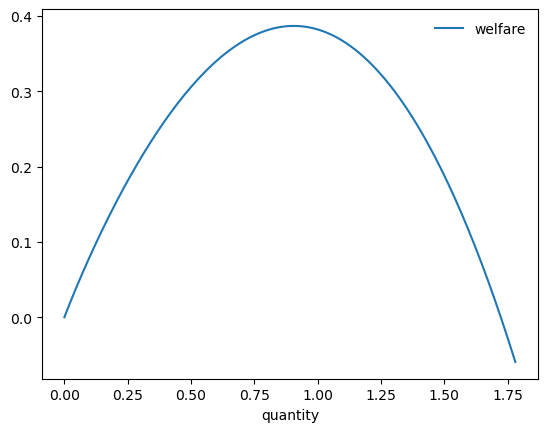

In [13]:
fig, ax = plt.subplots()
ax.plot(q_vals, W(q_vals, market), label='welfare')
ax.legend(frameon=False)
ax.set_xlabel('quantity')
plt.show()

In [14]:
from scipy.optimize import minimize_scalar

def objective(q):
    return -W(q, market)

result = minimize_scalar(objective, bounds=(0, 10))
print(result.message)

Solution found.


In [15]:
maximizing_q = result.x
print(f"{maximizing_q: .5f}")

 0.90564


In [16]:
from scipy.optimize import newton

def excess_demand(q):
    return market.inverse_demand(q) - market.inverse_supply(q)

equilibrium_q = newton(excess_demand, 0.99)
print(f"{equilibrium_q: .5f}")

 0.90564
